In [8]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "portfolio_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "hershyandrew/amzn-dpz-btc-ntfx-adjusted-may-2013may2019",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/w1/pnvh5zgj2yn66934n2gvwlcr0000gn/T/ipykernel_5442/1414998962.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 79.4k/79.4k [00:00<00:00, 2.53MB/s]

First 5 records:        Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285


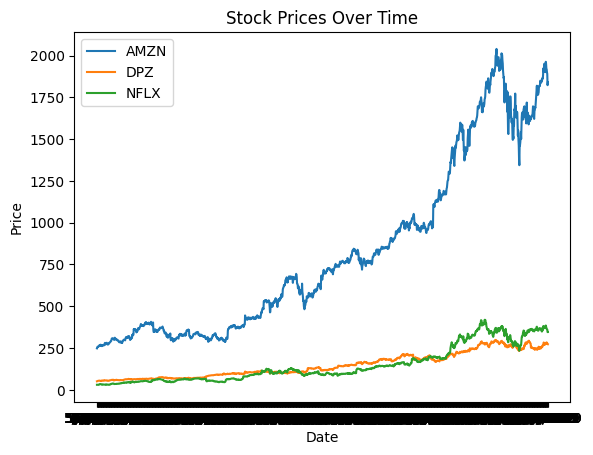

In [12]:
plt.plot(df['Date'], df['AMZN'], label='AMZN')
plt.plot(df['Date'], df['DPZ'], label='DPZ')
plt.plot(df['Date'], df['NFLX'], label='NFLX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()


In [19]:
df_macroeconomic = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sarthmirashi07/us-macroeconomic-data",
  "US_macroeconomics.csv",
)
df_macroeconomic.head()

/var/folders/w1/pnvh5zgj2yn66934n2gvwlcr0000gn/T/ipykernel_5442/1678016251.py:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_macroeconomic = kagglehub.load_dataset(


,date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings
0,1980-11-01,85.6,14.2050,7.5,200.685556,4976.5,1826.8,11.6
1,1980-12-01,86.4,14.7900,7.2,198.398636,4999.8,1851.7,11.4
2,1981-01-01,87.2,14.9040,7.5,198.817619,4980.4,1870.0,10.9
3,1981-02-01,88.0,15.1325,7.4,194.852105,4965.0,1884.2,10.8
4,1981-03-01,88.6,15.4000,7.4,203.593182,4979.0,1902.9,10.8


In [23]:
# Step 1: Convert 'date' column to datetime (if not already)
df_macroeconomic['date'] = pd.to_datetime(df_macroeconomic['date'])

# Step 3: Filter the DataFrame
df_filtered = df_macroeconomic[
    (df_macroeconomic['date'] >= '2015-05-01') &
    (df_macroeconomic['date'] <= '2019-05-01')
]

# Optional: Reset index if needed
df_filtered = df_filtered.reset_index(drop=True)

In [26]:
df["Date"] = pd.to_datetime(df["Date"])

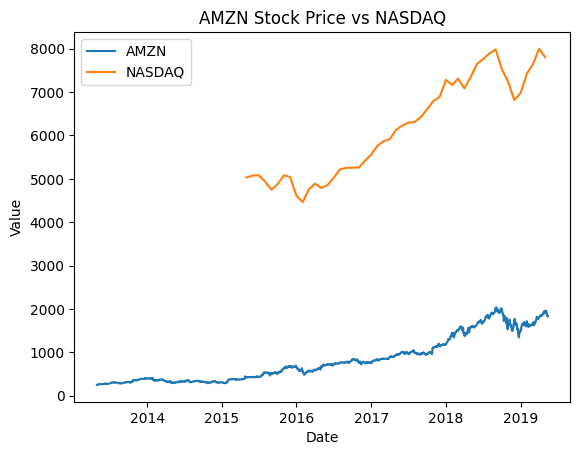

In [30]:
plt.plot(df['Date'], df['AMZN'], label='AMZN')
plt.plot(df_filtered['date'], df_filtered['NASDAQ'], label='NASDAQ')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('AMZN Stock Price vs NASDAQ')
plt.legend()